In [24]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display settings for better visibility
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Load the dataset (change path if needed)
file_path = 'b2b_master_for_eda_and_modeling.csv'
df = pd.read_csv(file_path)

# Basic information
print("📦 Dataset Shape:", df.shape)
print("\n🧠 Column Names:\n", df.columns.tolist())

print("\n🔍 Data Types and Non-Null Counts:")
print(df.info())

print("\n🧾 First 5 Rows:")
print(df.head())


📦 Dataset Shape: (14647, 14)

🧠 Column Names:
 ['GSTIN/UIN of Recipient', 'Receiver Name', 'Sender Name', 'Invoice Number', 'Invoice date', 'Invoice Value', 'Place Of Supply', 'Reverse Charge', 'Applicable % of Tax Rate', 'Invoice Type', 'E-Commerce GSTIN', 'Rate', 'Taxable Value', 'Cess Amount']

🔍 Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14647 entries, 0 to 14646
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GSTIN/UIN of Recipient    14647 non-null  object 
 1   Receiver Name             14647 non-null  object 
 2   Sender Name               14647 non-null  object 
 3   Invoice Number            14647 non-null  object 
 4   Invoice date              14647 non-null  object 
 5   Invoice Value             14647 non-null  float64
 6   Place Of Supply           14647 non-null  object 
 7   Reverse Charge            14647 non-null  object 
 8   App

In [25]:
# Checking how many missing (null) values are there in each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Creating a new dataframe to show both count and percentage of missing values
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage.round(2)
})

# Showing only those columns which have at least 1 missing value
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)
print("📉 Columns with Missing Values:\n")
print(missing_df)


📉 Columns with Missing Values:

Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []


In [26]:
# ✅ STEP 2A: Convert 'Invoice date' to datetime format
df['Invoice date'] = pd.to_datetime(df['Invoice date'], errors='coerce')

# ✅ STEP 2B: Strip leading/trailing spaces from object columns (if any)
object_cols = df.select_dtypes(include='object').columns
df[object_cols] = df[object_cols].apply(lambda x: x.str.strip())

# ✅ STEP 2C: Extract year, month, and day from 'Invoice date'
df['Invoice_Year'] = df['Invoice date'].dt.year
df['Invoice_Month'] = df['Invoice date'].dt.month
df['Invoice_Day'] = df['Invoice date'].dt.day

# ✅ Quick Sanity Check
print("Data types after cleaning:\n", df.dtypes)
print("\nSample rows with new columns:\n", df[['Invoice date', 'Invoice_Year', 'Invoice_Month', 'Invoice_Day']].head())


Data types after cleaning:
 GSTIN/UIN of Recipient              object
Receiver Name                       object
Sender Name                         object
Invoice Number                      object
Invoice date                datetime64[ns]
Invoice Value                      float64
Place Of Supply                     object
Reverse Charge                      object
Applicable % of Tax Rate           float64
Invoice Type                        object
E-Commerce GSTIN                    object
Rate                               float64
Taxable Value                      float64
Cess Amount                          int64
Invoice_Year                         int32
Invoice_Month                        int32
Invoice_Day                          int32
dtype: object

Sample rows with new columns:
   Invoice date  Invoice_Year  Invoice_Month  Invoice_Day
0   2024-01-13          2024              1           13
1   2024-01-15          2024              1           15
2   2024-01-16          

In [27]:
df.rename(columns={'Invoice date': 'Invoice Date'}, inplace=True)


In [28]:
# Getting summary statistics for all numeric columns
print("📊 Summary Statistics for Numeric Columns:")
display(df.describe())


📊 Summary Statistics for Numeric Columns:


,Invoice Date,Invoice Value,Applicable % of Tax Rate,Rate,Taxable Value,Cess Amount,Invoice_Year,Invoice_Month,Invoice_Day
count,14647,14647.000000,14647.0,14647.000000,14647.000000,14647.0,14647.000000,14647.000000,14647.000000
mean,2024-06-17 11:37:55.715163648,8967.998118,0.0,3.688810,397.273589,0.0,2024.017819,5.841264,15.766710
min,2024-01-02 00:00:00,65.240000,0.0,0.000000,0.000000,0.0,2024.000000,1.000000,1.000000
25%,2024-03-30 00:00:00,2022.425000,0.0,0.000000,0.000000,0.0,2024.000000,3.000000,8.000000
50%,2024-06-12 00:00:00,4765.270000,0.0,0.000000,0.000000,0.0,2024.000000,6.000000,16.000000
75%,2024-08-26 00:00:00,9869.500000,0.0,5.000000,221.360000,0.0,2024.000000,8.000000,23.000000
max,2025-02-24 00:00:00,99780.000000,0.0,18.000000,17786.700000,0.0,2025.000000,12.000000,31.000000
std,NaN,12566.041168,0.0,6.066139,1271.725403,0.0,0.132299,3.033654,8.810591


In [29]:
# Listing all categorical columns (including manually set ones or object types)
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Displaying unique values and their counts for each categorical column
print("📋 Categorical Column Value Distributions:\n")
for col in cat_cols:
    print(f"\n🔸 {col} - {df[col].nunique()} unique values")
    print(df[col].value_counts(dropna=False).head(10))  # Show top 10 most frequent


📋 Categorical Column Value Distributions:


🔸 GSTIN/UIN of Recipient - 14647 unique values
GSTIN/UIN of Recipient
36NPPAU1491WZT    1
32LOZMN2438JZS    1
32KVTYL5254PZ6    1
32WFICZ7189NZU    1
32AZFXA8409AZE    1
32DHAVV5007HZ0    1
32OEDLO1953YZ9    1
32DBCOA4540RZH    1
32GKLXZ5384KZ7    1
32KEEJF1821HZ0    1
Name: count, dtype: int64

🔸 Receiver Name - 100 unique values
Receiver Name
IDKWN    199
30T9N    197
EDTJV    197
VS4F8    196
E6IVW    195
5JSG6    194
CIYHE    193
KEP7Y    193
3J2D5    192
0L725    189
Name: count, dtype: int64

🔸 Sender Name - 100 unique values
Sender Name
Y6DPB    340
IXA11    282
RC11E    273
3J2D5    197
O6QJI    174
A1WJ0    173
M5IGQ    170
EL624    165
HT0HL    163
WZS3T    163
Name: count, dtype: int64

🔸 Invoice Number - 14647 unique values
Invoice Number
06EV5677    1
42TH1874    1
42TH1876    1
42TH1877    1
42TH1878    1
42TH1879    1
42TH1880    1
42TH1881    1
42TH1882    1
42TH1883    1
Name: count, dtype: int64

🔸 Place Of Supply - 35 uniqu

In [30]:
# Quick view of number of unique values per column
print("\n🔍 Unique Values Count per Column:")
print(df.nunique().sort_values(ascending=False))



🔍 Unique Values Count per Column:
GSTIN/UIN of Recipient      14647
Invoice Number              14647
Invoice Value                8338
Taxable Value                3017
Invoice Date                  417
Receiver Name                 100
Sender Name                   100
Place Of Supply                35
Invoice_Day                    31
Invoice_Month                  12
Rate                            5
Invoice_Year                    2
Invoice Type                    1
E-Commerce GSTIN                1
Reverse Charge                  1
Cess Amount                     1
Applicable % of Tax Rate        1
dtype: int64


step3 univariate analysis starts here

📊 Numerical Columns:
Index(['Invoice Value', 'Applicable % of Tax Rate', 'Rate', 'Taxable Value',
       'Cess Amount'],
      dtype='object')

📈 Plotting Histograms for Numeric Columns...


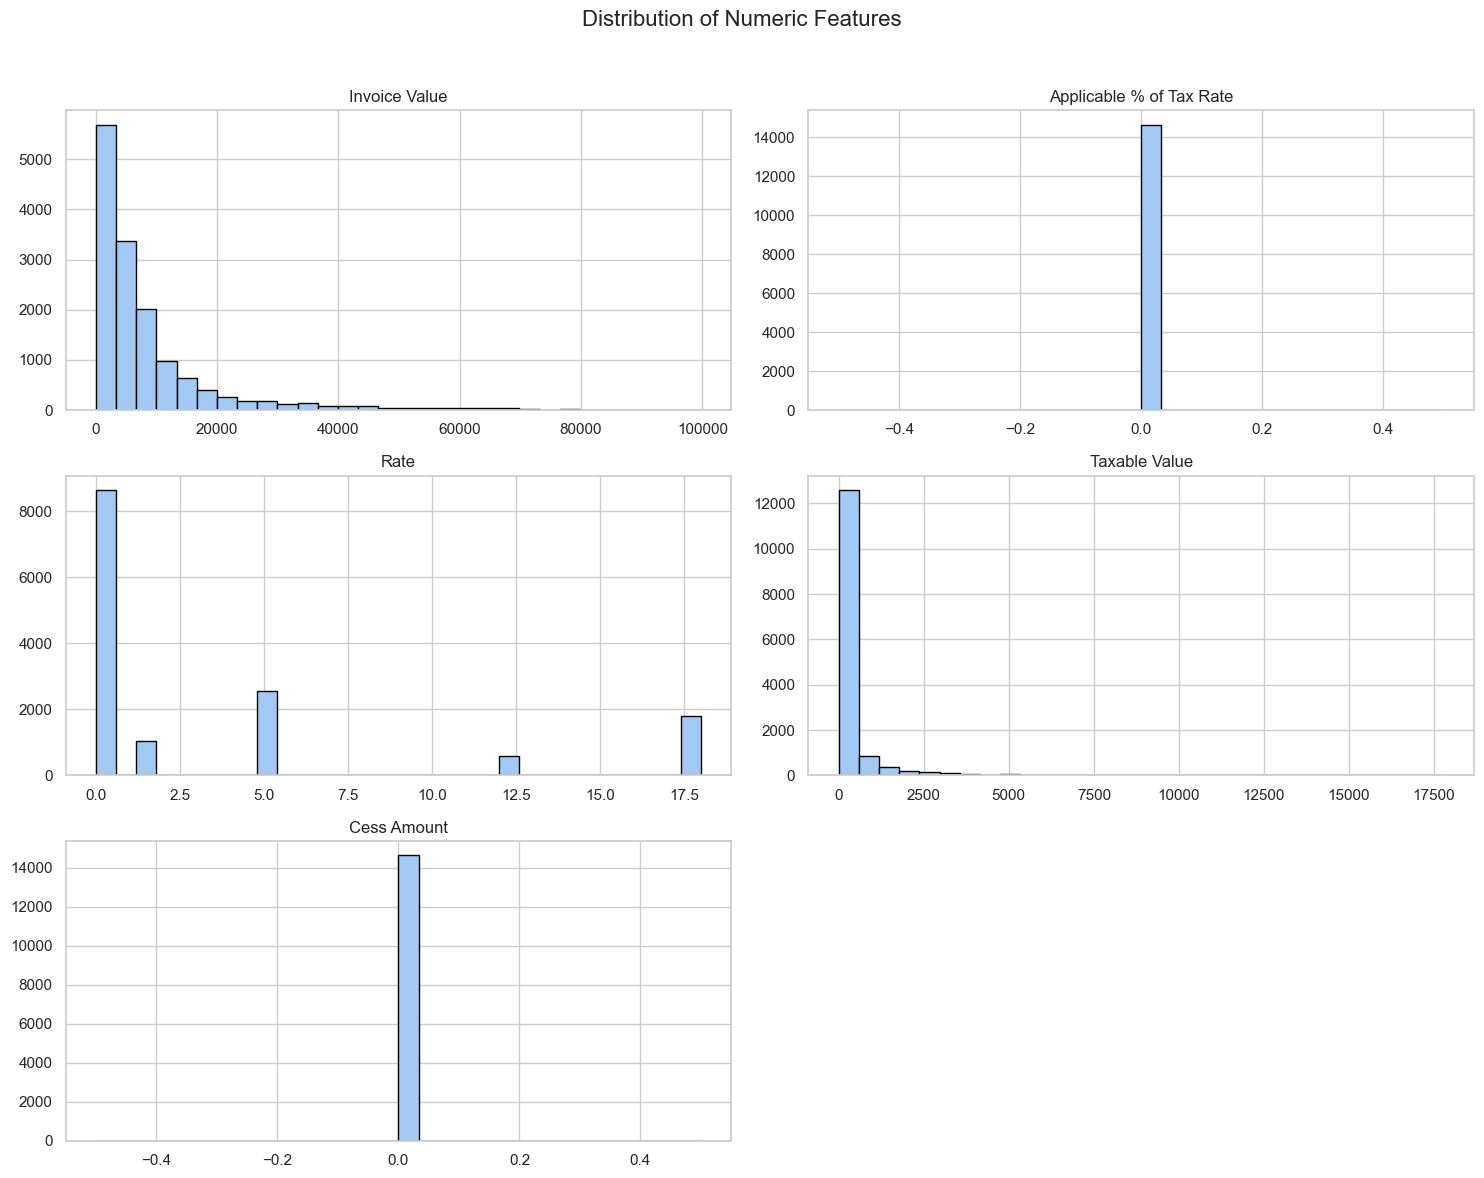

🔍 Checking for Outliers in Numeric Columns...


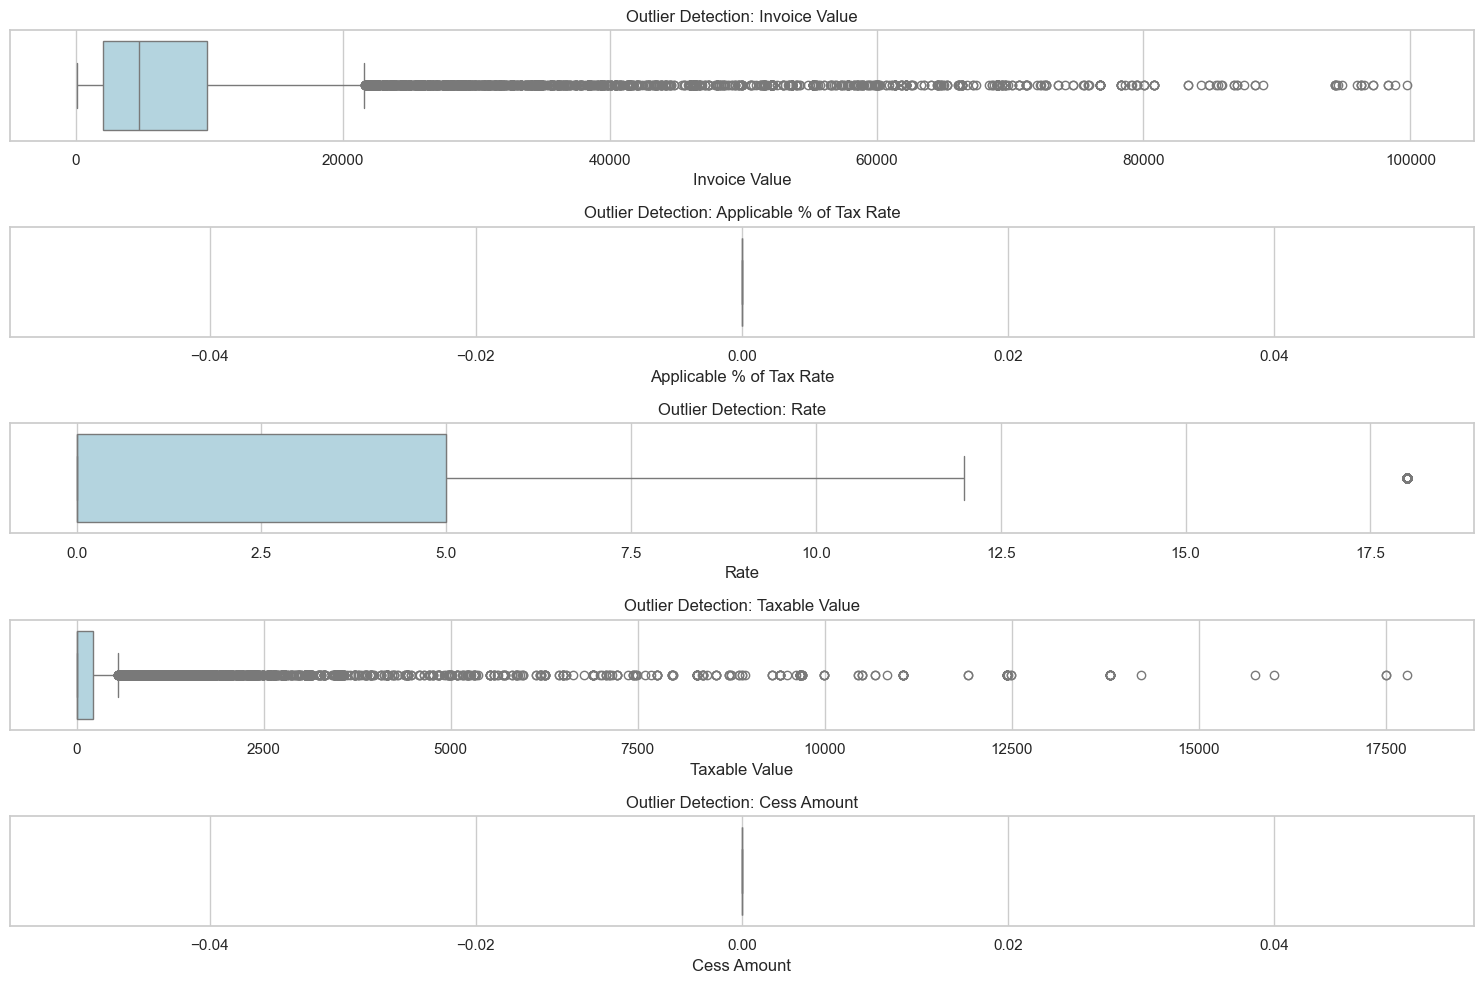

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("📊 Numerical Columns:")
print(numeric_cols)

# Histograms – For distribution of each numeric column
print("\n📈 Plotting Histograms for Numeric Columns...")

df[numeric_cols].hist(bins=30, figsize=(15, 12), edgecolor='black')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Boxplots – To check for outliers visually
print("🔍 Checking for Outliers in Numeric Columns...")

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(data=df, x=col, color='lightblue')
    plt.title(f'Outlier Detection: {col}')
    plt.tight_layout()
plt.show()


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# General display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='pastel')

# Basic info
print("🔍 Dataset Shape:", df.shape)
print("\n🧠 Data Types and Null Counts:\n")
print(df.info())

# Check % of missing values
print("\n📉 Percentage of Missing Values:")
missing_percent = df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))


🔍 Dataset Shape: (14647, 17)

🧠 Data Types and Null Counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14647 entries, 0 to 14646
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   GSTIN/UIN of Recipient    14647 non-null  object        
 1   Receiver Name             14647 non-null  object        
 2   Sender Name               14647 non-null  object        
 3   Invoice Number            14647 non-null  object        
 4   Invoice Date              14647 non-null  datetime64[ns]
 5   Invoice Value             14647 non-null  float64       
 6   Place Of Supply           14647 non-null  object        
 7   Reverse Charge            14647 non-null  object        
 8   Applicable % of Tax Rate  14647 non-null  float64       
 9   Invoice Type              14647 non-null  object        
 10  E-Commerce GSTIN          14647 non-null  object        
 11  Rate               

In [33]:
print(df.columns.tolist())


['GSTIN/UIN of Recipient', 'Receiver Name', 'Sender Name', 'Invoice Number', 'Invoice Date', 'Invoice Value', 'Place Of Supply', 'Reverse Charge', 'Applicable % of Tax Rate', 'Invoice Type', 'E-Commerce GSTIN', 'Rate', 'Taxable Value', 'Cess Amount', 'Invoice_Year', 'Invoice_Month', 'Invoice_Day']


In [34]:
# Describe numeric columns (quantitative)
print("\n📊 Descriptive Stats for Numeric Columns:")
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
display(df[numeric_cols].describe().T)



📊 Descriptive Stats for Numeric Columns:


,count,mean,std,min,25%,50%,75%,max
Invoice Value,14647.0,8967.998118,12566.041168,65.24,2022.425,4765.27,9869.50,99780.0
Applicable % of Tax Rate,14647.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.0
Rate,14647.0,3.688810,6.066139,0.00,0.000,0.00,5.00,18.0
Taxable Value,14647.0,397.273589,1271.725403,0.00,0.000,0.00,221.36,17786.7
Cess Amount,14647.0,0.000000,0.000000,0.00,0.000,0.00,0.00,0.0


In [35]:
# Describe categorical features
cat_cols = df.select_dtypes(include=['object']).columns

print("📋 Value Counts for Categorical Columns:")
for col in cat_cols:
    print(f"\n🔹 {col} - Unique: {df[col].nunique()}")
    print(df[col].value_counts(dropna=False).head(10))


📋 Value Counts for Categorical Columns:

🔹 GSTIN/UIN of Recipient - Unique: 14647
GSTIN/UIN of Recipient
36NPPAU1491WZT    1
32LOZMN2438JZS    1
32KVTYL5254PZ6    1
32WFICZ7189NZU    1
32AZFXA8409AZE    1
32DHAVV5007HZ0    1
32OEDLO1953YZ9    1
32DBCOA4540RZH    1
32GKLXZ5384KZ7    1
32KEEJF1821HZ0    1
Name: count, dtype: int64

🔹 Receiver Name - Unique: 100
Receiver Name
IDKWN    199
30T9N    197
EDTJV    197
VS4F8    196
E6IVW    195
5JSG6    194
CIYHE    193
KEP7Y    193
3J2D5    192
0L725    189
Name: count, dtype: int64

🔹 Sender Name - Unique: 100
Sender Name
Y6DPB    340
IXA11    282
RC11E    273
3J2D5    197
O6QJI    174
A1WJ0    173
M5IGQ    170
EL624    165
HT0HL    163
WZS3T    163
Name: count, dtype: int64

🔹 Invoice Number - Unique: 14647
Invoice Number
06EV5677    1
42TH1874    1
42TH1876    1
42TH1877    1
42TH1878    1
42TH1879    1
42TH1880    1
42TH1881    1
42TH1882    1
42TH1883    1
Name: count, dtype: int64

🔹 Place Of Supply - Unique: 35
Place Of Supply
01-JAMMU

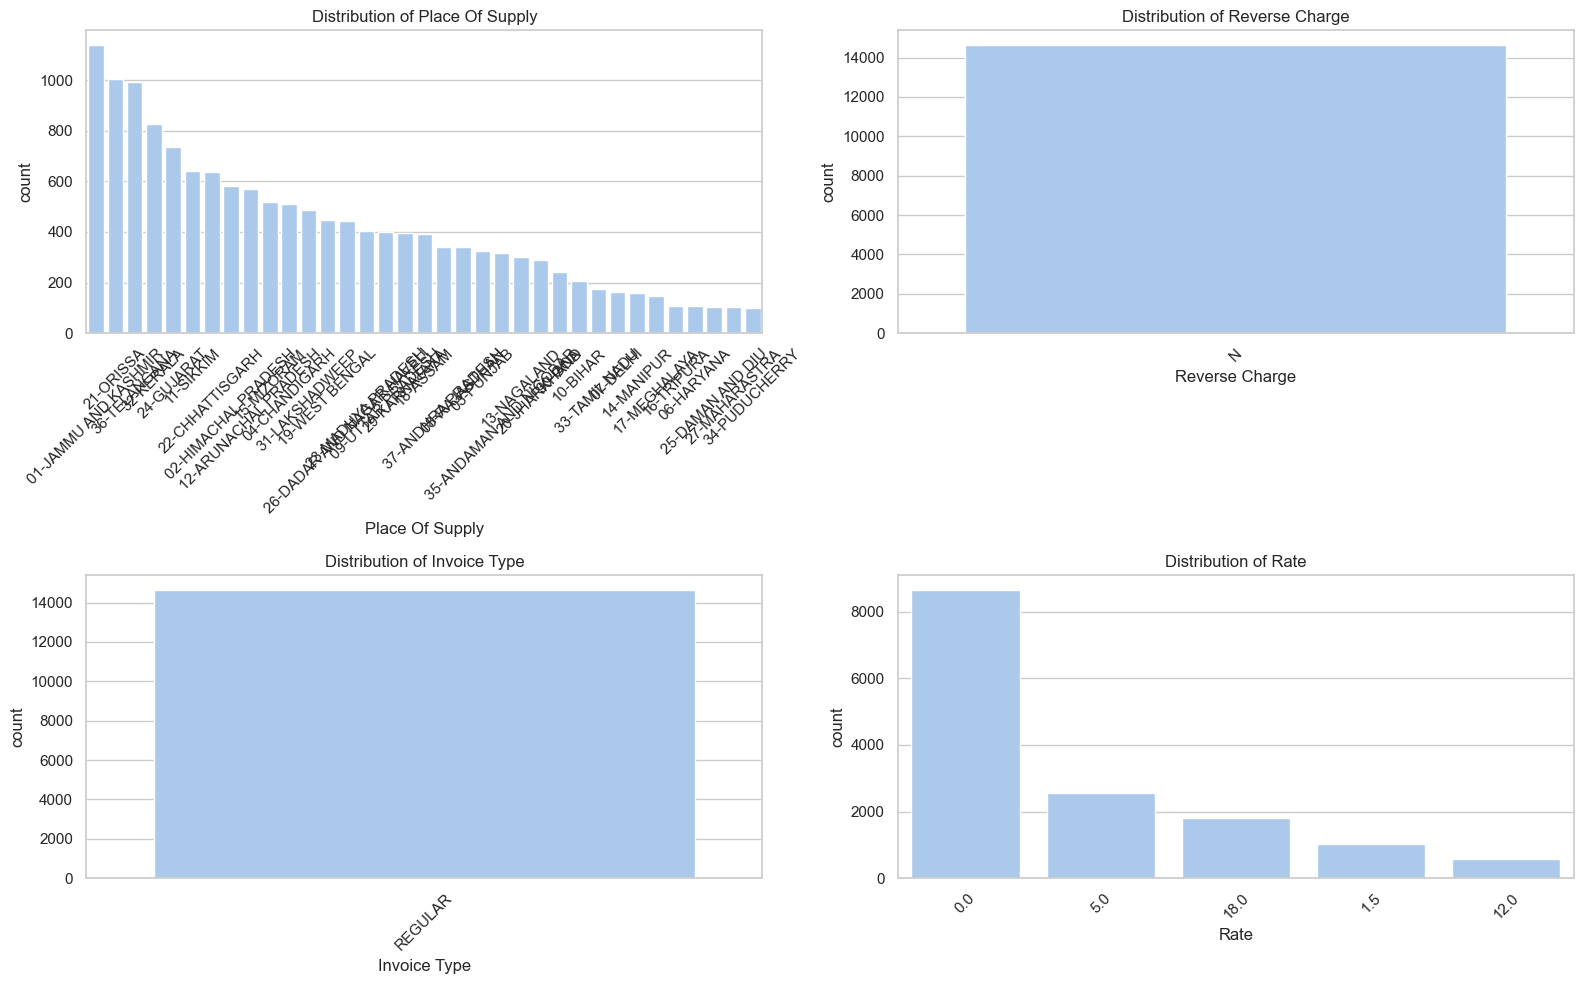

In [36]:
# Bar plots for key categorical fields
cat_to_plot = ['Place Of Supply', 'Reverse Charge', 'Invoice Type', 'Rate']

plt.figure(figsize=(16, 10))
for i, col in enumerate(cat_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()


bivariate analysis starts here


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16948\1066009320.py:11: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


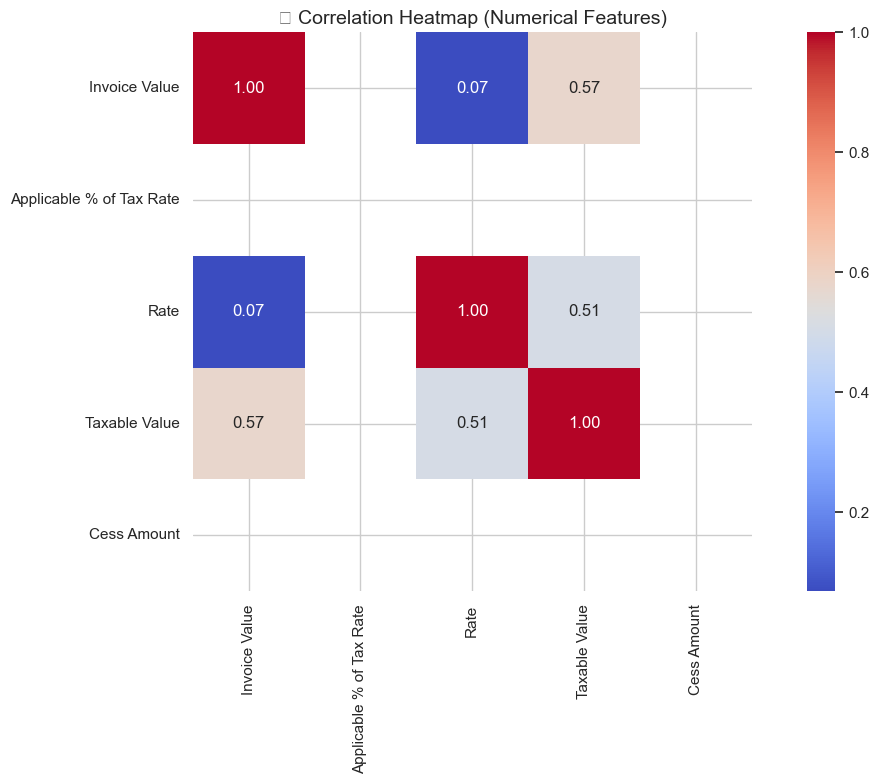

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation between all numeric columns
corr_matrix = df[numeric_cols].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('🔗 Correlation Heatmap (Numerical Features)', fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16948\2250011162.py:6: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


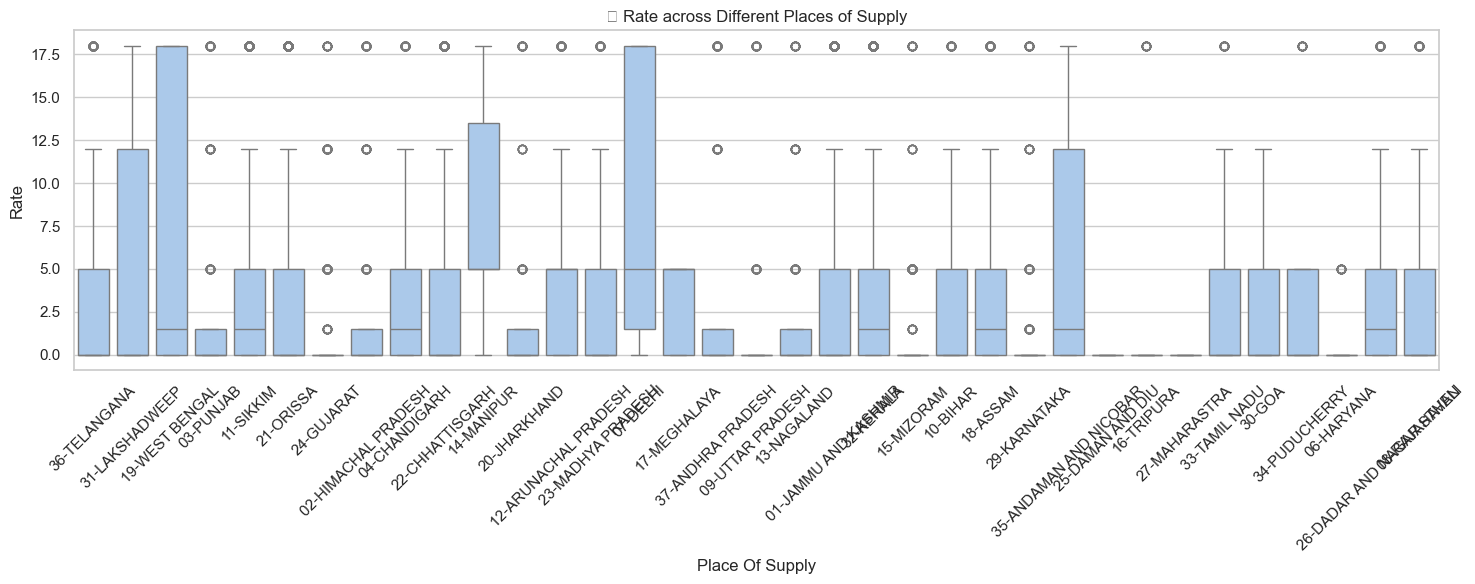

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16948\2250011162.py:12: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


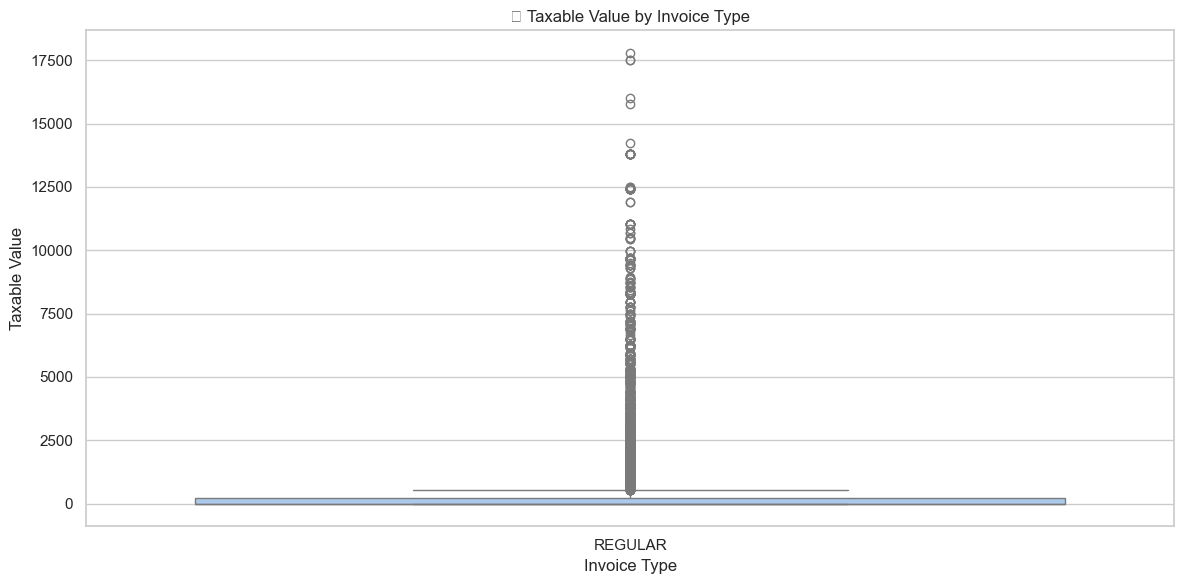

In [38]:
# Example: Distribution of Rate across Place of Supply
plt.figure(figsize=(15, 6))
sns.boxplot(x='Place Of Supply', y='Rate', data=df)
plt.xticks(rotation=45)
plt.title('📦 Rate across Different Places of Supply')
plt.tight_layout()
plt.show()
# Example: Taxable Value vs Invoice Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Invoice Type', y='Taxable Value', data=df)
plt.title('💸 Taxable Value by Invoice Type')
plt.tight_layout()
plt.show()



In [39]:
# Mean Taxable Value by Place Of Supply
df.groupby('Place Of Supply')['Taxable Value'].mean().sort_values(ascending=False)
# Count of Invoices by Invoice Type and Reverse Charge
pd.crosstab(df['Invoice Type'], df['Reverse Charge'])


Reverse Charge,N
Invoice Type,
REGULAR,14647


🏙️ Top 10 States by Median Taxable Value:
Place Of Supply
17-MEGHALAYA                 493.30
14-MANIPUR                   280.03
07-DELHI                     108.92
26-DADAR AND NAGAR HAVELI     81.78
12-ARUNACHAL PRADESH          70.74
35-ANDAMAN AND NICOBAR        67.20
04-CHANDIGARH                 63.32
11-SIKKIM                     56.10
19-WEST BENGAL                37.01
32-KERALA                     18.76
Name: Taxable Value, dtype: float64

📉 Top 10 States by Std Dev of Taxable Value:
Place Of Supply
31-LAKSHADWEEP            3705.220506
07-DELHI                  2467.843303
08-RAJASTHAN              2067.027585
35-ANDAMAN AND NICOBAR    2064.676294
18-ASSAM                  1937.722447
11-SIKKIM                 1844.776053
33-TAMIL NADU             1602.519080
10-BIHAR                  1548.267182
04-CHANDIGARH             1396.797871
17-MEGHALAYA              1238.514721
Name: Taxable Value, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16948\1873780528.py:17: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16948\1873780528.py:17: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


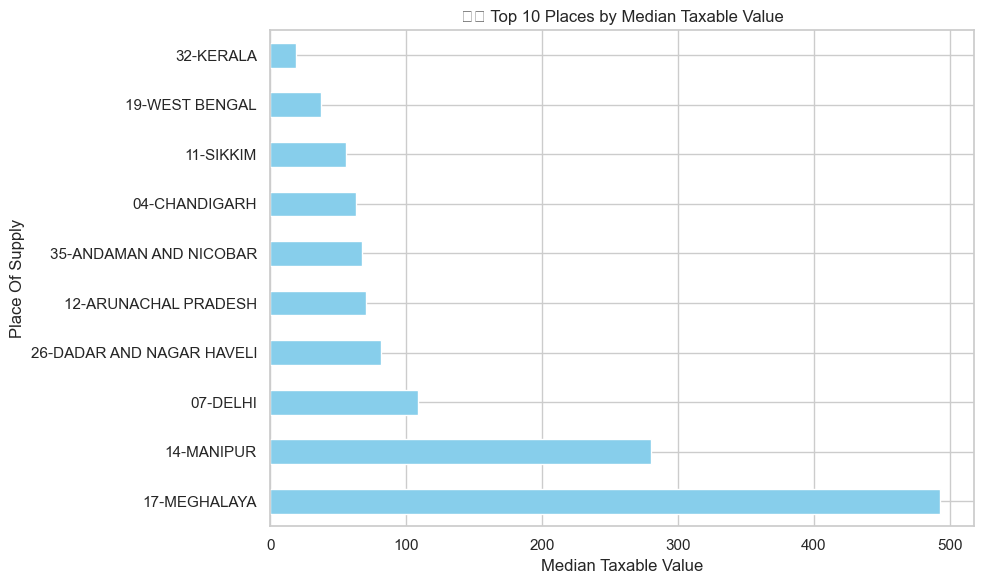

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16948\1873780528.py:24: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


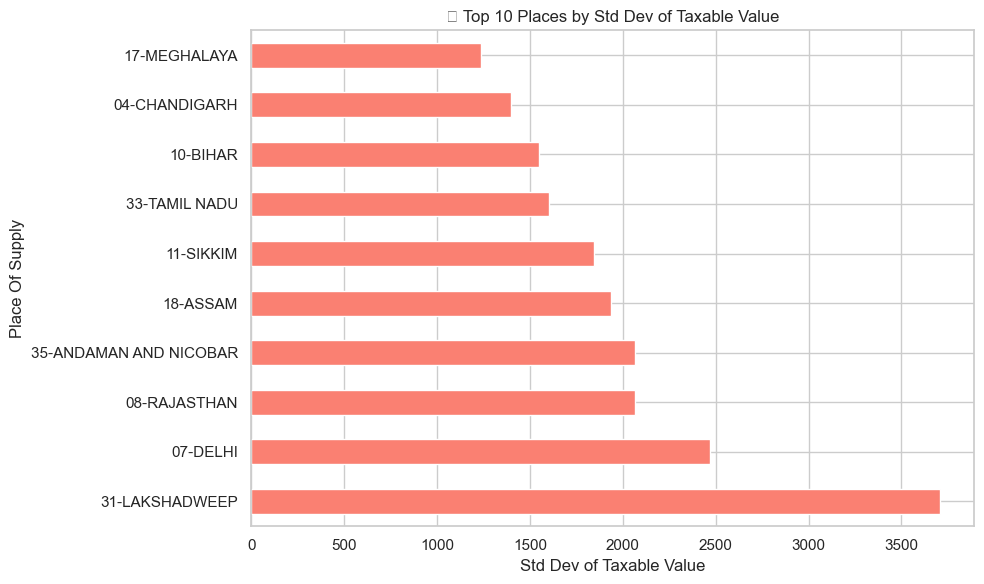

In [40]:
# Median Taxable Value by Place Of Supply
medians = df.groupby('Place Of Supply')['Taxable Value'].median().sort_values(ascending=False)

# Std Dev of Taxable Value by Place Of Supply
stds = df.groupby('Place Of Supply')['Taxable Value'].std().sort_values(ascending=False)

# Show top 10 by median and std
print("🏙️ Top 10 States by Median Taxable Value:")
print(medians.head(10))

print("\n📉 Top 10 States by Std Dev of Taxable Value:")
print(stds.head(10))
# Barplot for Median
medians.head(10).plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('🏙️ Top 10 Places by Median Taxable Value')
plt.xlabel('Median Taxable Value')
plt.tight_layout()
plt.show()

# Barplot for Std Dev
stds.head(10).plot(kind='barh', figsize=(10, 6), color='salmon')
plt.title('📉 Top 10 Places by Std Dev of Taxable Value')
plt.xlabel('Std Dev of Taxable Value')
plt.tight_layout()
plt.show()


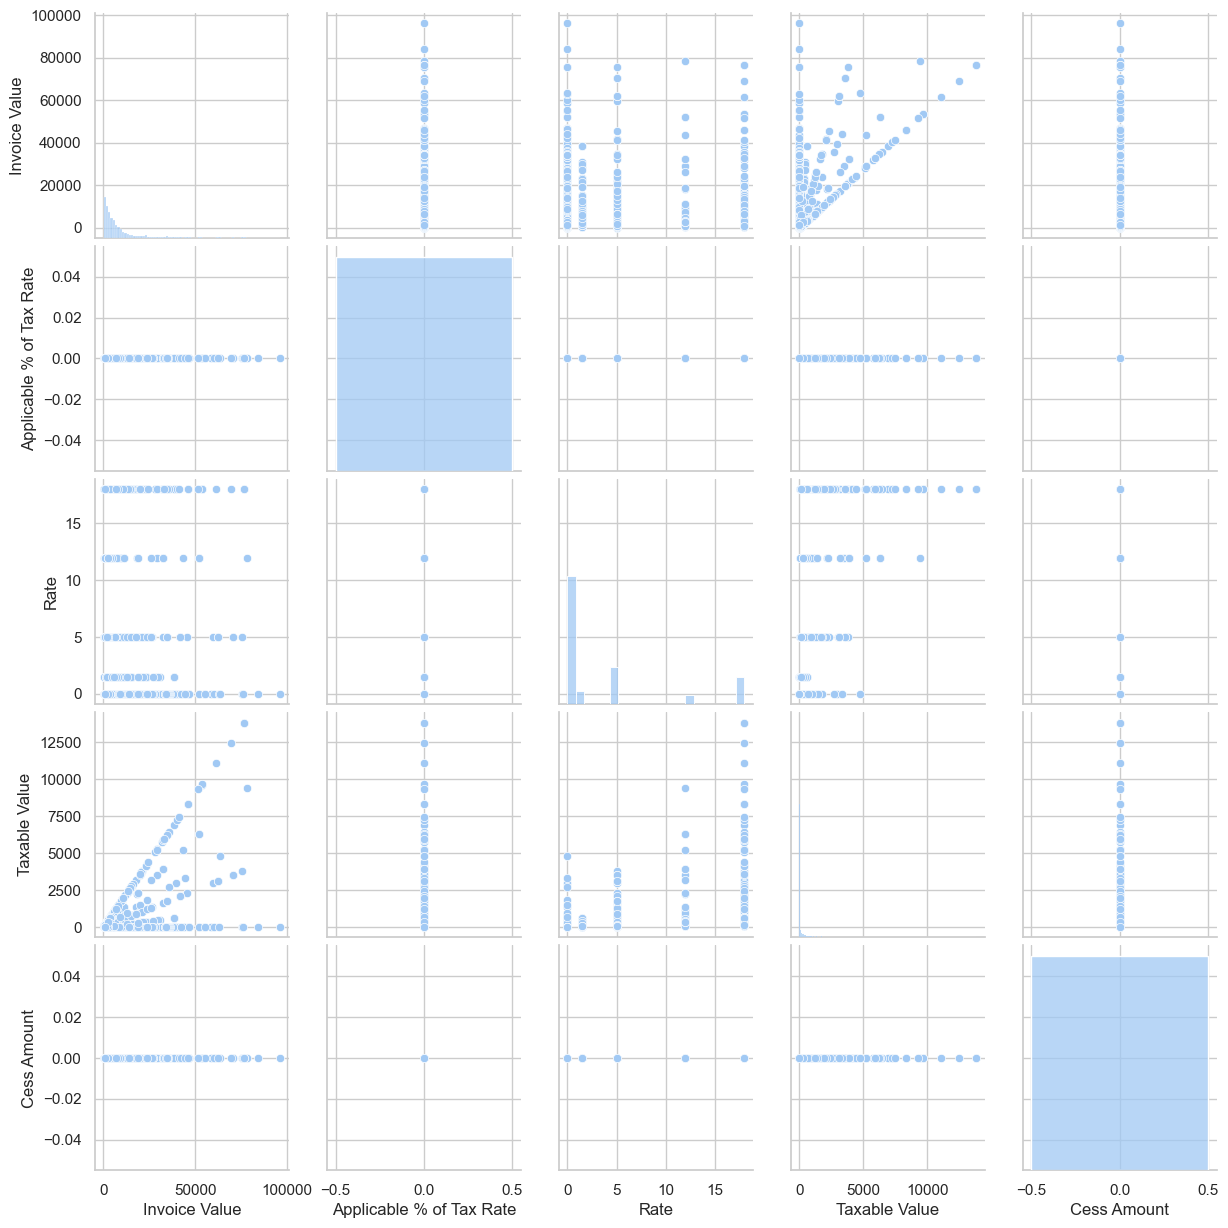

In [41]:
import seaborn as sns

# Take a random sample of 1,500 rows
df_sample = df.sample(n=1500, random_state=42)

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot pairplot
sns.pairplot(df_sample[numeric_cols])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16948\1842960296.py:13: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


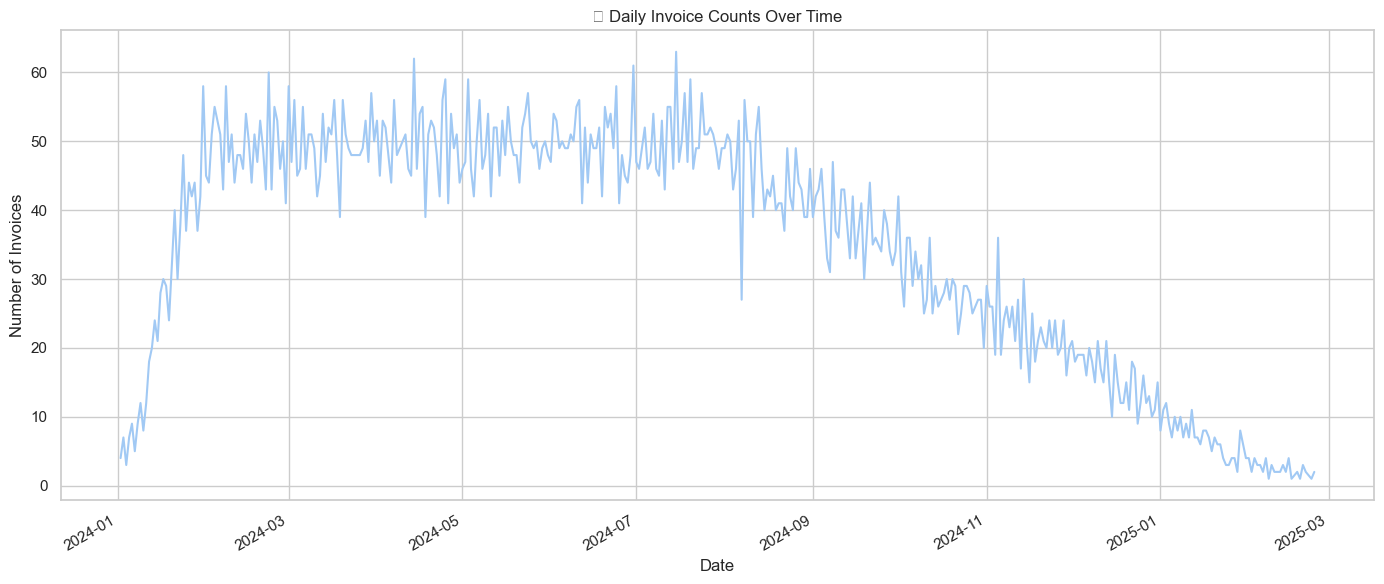

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16948\1842960296.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_invoice_value = df.resample('M', on='Invoice Date')['Invoice Value'].sum()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16948\1842960296.py:25: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


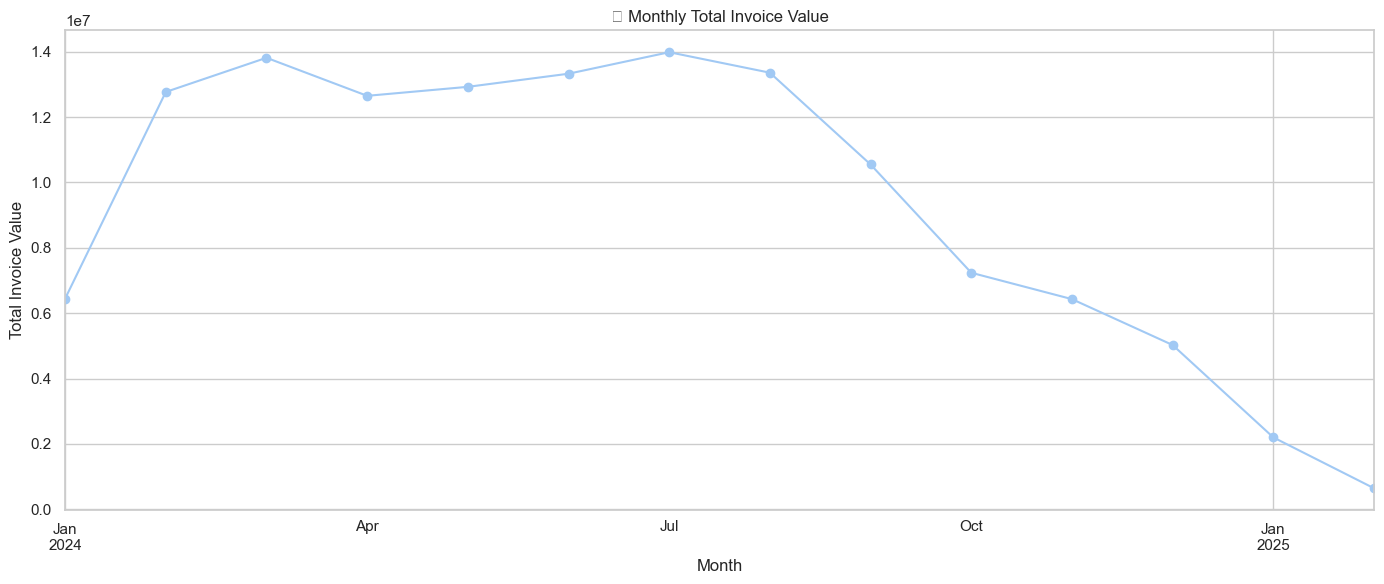

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16948\1842960296.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_invoice_count = df.resample('M', on='Invoice Date').size()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16948\1842960296.py:37: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


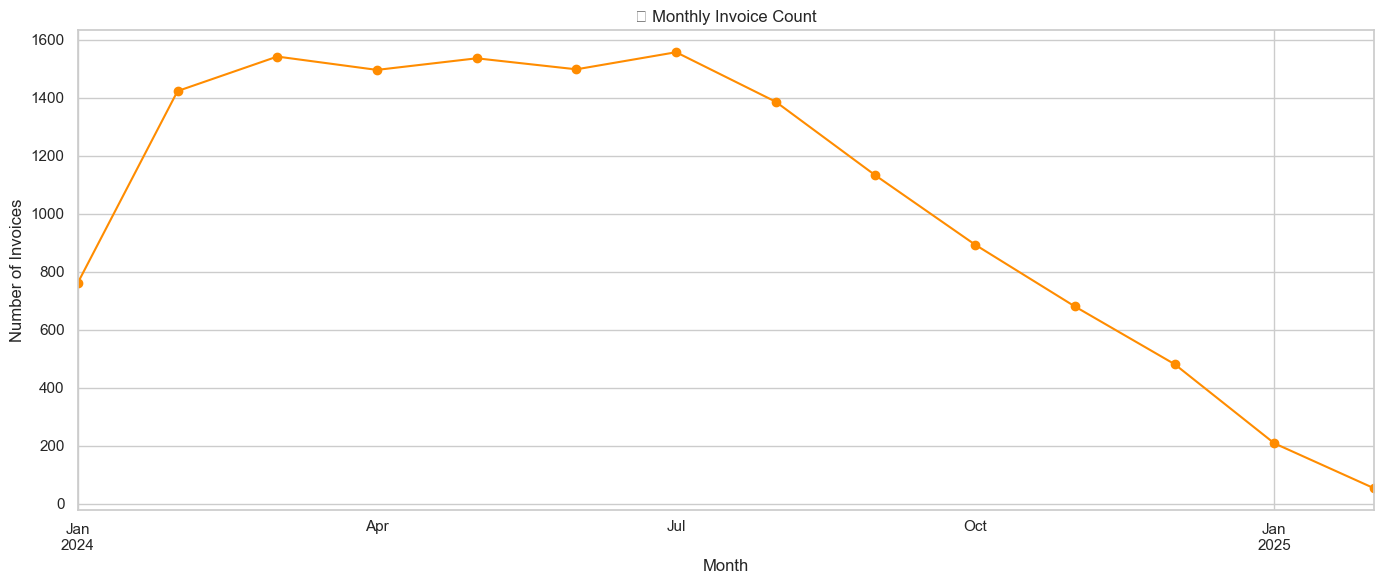

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16948\1842960296.py:41: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_value = df.resample('Q', on='Invoice Date')['Invoice Value'].sum()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16948\1842960296.py:48: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


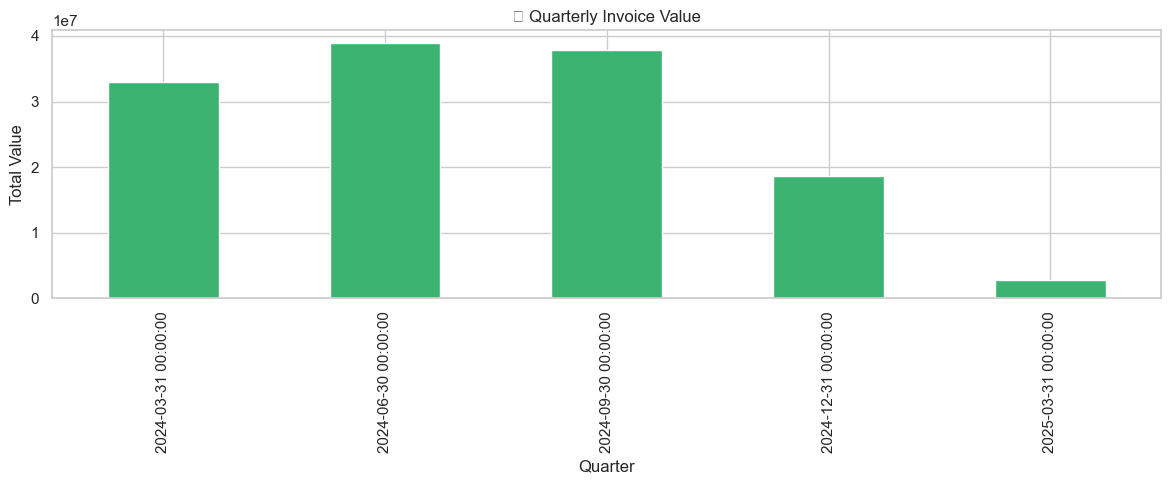

In [42]:
# ✅ STEP 8: Date-based Analysis

import matplotlib.dates as mdates

# 8A. Invoice Counts Over Time (Daily)
daily_counts = df.groupby('Invoice Date').size()

plt.figure(figsize=(14, 6))
daily_counts.plot()
plt.title('📅 Daily Invoice Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Invoices')
plt.tight_layout()
plt.show()

# 8B. Monthly Trends – Total Invoice Value
monthly_invoice_value = df.resample('M', on='Invoice Date')['Invoice Value'].sum()

plt.figure(figsize=(14, 6))
monthly_invoice_value.plot(marker='o')
plt.title('📈 Monthly Total Invoice Value')
plt.xlabel('Month')
plt.ylabel('Total Invoice Value')
plt.grid(True)
plt.tight_layout()
plt.show()

# 8C. Monthly Trends – Invoice Count
monthly_invoice_count = df.resample('M', on='Invoice Date').size()

plt.figure(figsize=(14, 6))
monthly_invoice_count.plot(marker='o', color='darkorange')
plt.title('🧾 Monthly Invoice Count')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.grid(True)
plt.tight_layout()
plt.show()

# 8D. Optional: Quarterly Invoice Value Trend
quarterly_value = df.resample('Q', on='Invoice Date')['Invoice Value'].sum()

plt.figure(figsize=(12, 5))
quarterly_value.plot(kind='bar', color='mediumseagreen')
plt.title('📊 Quarterly Invoice Value')
plt.ylabel('Total Value')
plt.xlabel('Quarter')
plt.tight_layout()
plt.show()


In [43]:
import pandas as pd
import re

# ✅ 9A. Duplicate Invoice Check – Based on key invoice fields
duplicate_invoices = df.duplicated(subset=['Invoice Number', 'Sender Name', 'Invoice Date'], keep=False)
print(f"🧾 Number of duplicate invoices: {duplicate_invoices.sum()}")

# Show sample duplicate records
print("\n🔍 Sample Duplicate Invoices:")
display(df[duplicate_invoices].sort_values(by='Invoice Number').head(10))

# ✅ 9B. Custom GSTIN Validity Check – Assumes GSTINs are 14 characters intentionally
def is_valid_gstin_custom(gstin):
    if pd.isna(gstin):
        return False
    return isinstance(gstin, str) and len(gstin.strip()) == 14

# Apply custom GSTIN check
df['Recipient GSTIN Valid'] = df['GSTIN/UIN of Recipient'].apply(is_valid_gstin_custom)
df['E-Com GSTIN Valid'] = df['E-Commerce GSTIN'].apply(is_valid_gstin_custom)

# Count invalid GSTINs
invalid_recipient = (~df['Recipient GSTIN Valid']).sum()
# invalid_ecom = (~df['E-Com GSTIN Valid']).sum()
print(f"\n🚫 Invalid Recipient GSTINs (not 14 chars): {invalid_recipient}")
# print(f"🚫 Invalid E-Commerce GSTINs (not 14 chars): {invalid_ecom}")

# ✅ 9C. Zero or Negative Value Checks
zero_rate = df[df['Rate'] == 0]
zero_taxable = df[df['Taxable Value'] == 0]
negative_cess = df[df['Cess Amount'] < 0]

print(f"\n⚠️ Rows with Rate = 0: {len(zero_rate)}")
print(f"⚠️ Rows with Taxable Value = 0: {len(zero_taxable)}")
print(f"⚠️ Rows with Cess Amount < 0: {len(negative_cess)}")

# Optionally display first few problematic rows
print("\n🔍 Sample Zero Rate:")
display(zero_rate.head())

print("\n🔍 Sample Zero Taxable Value:")
display(zero_taxable.head())

print("\n🔍 Sample Negative Cess:")
display(negative_cess.head())


🧾 Number of duplicate invoices: 0

🔍 Sample Duplicate Invoices:


,GSTIN/UIN of Recipient,Receiver Name,Sender Name,Invoice Number,Invoice Date,Invoice Value,Place Of Supply,Reverse Charge,Applicable % of Tax Rate,Invoice Type,E-Commerce GSTIN,Rate,Taxable Value,Cess Amount,Invoice_Year,Invoice_Month,Invoice_Day



🚫 Invalid Recipient GSTINs (not 14 chars): 0

⚠️ Rows with Rate = 0: 8650
⚠️ Rows with Taxable Value = 0: 8411
⚠️ Rows with Cess Amount < 0: 0

🔍 Sample Zero Rate:


,GSTIN/UIN of Recipient,Receiver Name,Sender Name,Invoice Number,Invoice Date,Invoice Value,Place Of Supply,Reverse Charge,Applicable % of Tax Rate,Invoice Type,E-Commerce GSTIN,Rate,Taxable Value,Cess Amount,Invoice_Year,Invoice_Month,Invoice_Day,Recipient GSTIN Valid,E-Com GSTIN Valid
1,36SWKZR0835PZY,3KX7E,CGVYI,06EV5678,2024-01-15,5983.12,36-TELANGANA,N,0.0,REGULAR,NILL,0.0,0.0,0,2024,1,15,True,False
5,36YOBLY6338AZV,3KX7E,W1SWJ,06EV5682,2024-01-22,1790.22,36-TELANGANA,N,0.0,REGULAR,NILL,0.0,0.0,0,2024,1,22,True,False
8,36KWANM5691FZW,3KX7E,W1SWJ,06EV5685,2024-01-28,10470.46,36-TELANGANA,N,0.0,REGULAR,NILL,0.0,0.0,0,2024,1,28,True,False
10,36RWLXC5727SZZ,3KX7E,IXA11,06EV5687,2024-02-02,5983.12,36-TELANGANA,N,0.0,REGULAR,NILL,0.0,0.0,0,2024,2,2,True,False
11,36NVMSJ3054CZR,3KX7E,XEPQ8,06EV5688,2024-02-05,624.08,36-TELANGANA,N,0.0,REGULAR,NILL,0.0,0.0,0,2024,2,5,True,False



🔍 Sample Zero Taxable Value:


,GSTIN/UIN of Recipient,Receiver Name,Sender Name,Invoice Number,Invoice Date,Invoice Value,Place Of Supply,Reverse Charge,Applicable % of Tax Rate,Invoice Type,E-Commerce GSTIN,Rate,Taxable Value,Cess Amount,Invoice_Year,Invoice_Month,Invoice_Day,Recipient GSTIN Valid,E-Com GSTIN Valid
1,36SWKZR0835PZY,3KX7E,CGVYI,06EV5678,2024-01-15,5983.12,36-TELANGANA,N,0.0,REGULAR,NILL,0.0,0.0,0,2024,1,15,True,False
5,36YOBLY6338AZV,3KX7E,W1SWJ,06EV5682,2024-01-22,1790.22,36-TELANGANA,N,0.0,REGULAR,NILL,0.0,0.0,0,2024,1,22,True,False
8,36KWANM5691FZW,3KX7E,W1SWJ,06EV5685,2024-01-28,10470.46,36-TELANGANA,N,0.0,REGULAR,NILL,0.0,0.0,0,2024,1,28,True,False
10,36RWLXC5727SZZ,3KX7E,IXA11,06EV5687,2024-02-02,5983.12,36-TELANGANA,N,0.0,REGULAR,NILL,0.0,0.0,0,2024,2,2,True,False
11,36NVMSJ3054CZR,3KX7E,XEPQ8,06EV5688,2024-02-05,624.08,36-TELANGANA,N,0.0,REGULAR,NILL,0.0,0.0,0,2024,2,5,True,False



🔍 Sample Negative Cess:


,GSTIN/UIN of Recipient,Receiver Name,Sender Name,Invoice Number,Invoice Date,Invoice Value,Place Of Supply,Reverse Charge,Applicable % of Tax Rate,Invoice Type,E-Commerce GSTIN,Rate,Taxable Value,Cess Amount,Invoice_Year,Invoice_Month,Invoice_Day,Recipient GSTIN Valid,E-Com GSTIN Valid
